## Feature Scaling

**Simple Example**

In [1]:
from __future__ import division
def featureScaling(arr):
    
    maxxy = max(arr)
    minny = min(arr)
    
    if maxxy == minny:
        raise ValueError('min aand max same')

    rescaled_arr = [float((x-minny)/(maxxy-minny)) for x in arr]
    return rescaled_arr

# tests of your feature scaler--line below is input data
data = [115, 140, 175]
print featureScaling(data)

[0.0, 0.4166666666666667, 1.0]


**Using SK learn**

Ref: http://scikit-learn.org/stable/modules/preprocessing.html

In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy

weights = numpy.array(  # only numpy arrays allowed
                    [
                        [115.], [140.],[175.]  # only floating point allowed
                    ]
                    )
scaler = MinMaxScaler()
rescaled_weight = scaler.fit_transform(weights)
rescaled_weight

array([[0.        ],
       [0.41666667],
       [1.        ]])

Feature scaling 

**affects** SVM, K-means etc.   
**does not affect** Decision trees, linear regression etc

**Computing Rescaled Features**

Apply feature scaling to your k-means clustering code from the last lesson, on the "salary" and "exercised_stock_options" features (use only these two features).  

What would be the rescaled value of a "salary" feature that had an original value of \$200,000, and an "exercised_stock_options" feature of $1 million? (Be sure to represent these numbers as floats, not integers!)

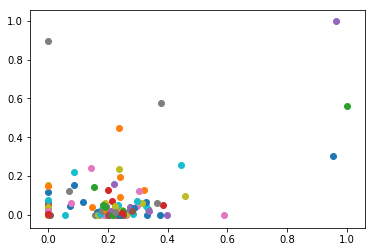

after k means clustering..


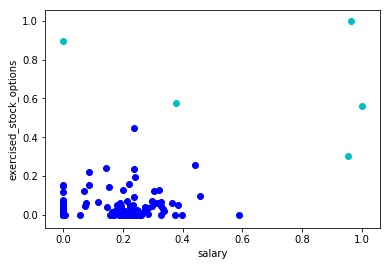

In [3]:
#k_means_cluster.py
%matplotlib inline

#!/usr/bin/python 
""" 
    Skeleton code for k-means clustering mini-project.
"""
import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../17. Final Project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)

### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

### FEATURE RESCALING
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
finance_features_rescaled = scaler.fit_transform(finance_features)

### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features_rescaled:
    plt.scatter( f1, f2 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(finance_features_rescaled)
pred = kmeans.predict(finance_features_rescaled)

print 'after k means clustering..'
### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features_rescaled, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

In [4]:
import numpy as np
X_test = np.array([
                [200000.0,1000000.0]
                ])
X_test_rescaled = scaler.transform(X_test)
X_test_rescaled

array([[0.17997621, 0.02911345]])